In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(1)
random.seed(1)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

In [2]:
import cv2

a = cv2.imread("/data/zalo/hit-song-prediction/train/1076417366.mp3")


In [3]:
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = np.nan
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
print(len(df))
df_track_info = pd.read_csv("../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")

df = df.sort_values(by=['ID'])
df= df.reset_index()
# for i,o in df.iterrows():
#     print(o.ID,"------",o.album,"--------", o.genre,"------",o.artist_name,"---",o.label)
df.columns
# print(len(df))
df.head(20)

10196


,index,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7.0,train,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3.0,train,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6.0,train,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2.0,train,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7.0,train,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3.0,train,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,9078,1073994292,Giấc Mơ Mình Em,Minh Tuyết,455,Minh Vy,100019,2017-11-01 18:27:00,NaN,test,...,441.782684,0.659616,Bb,major,Bb,major,Bb,major,Bb,major
8,7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8.0,train,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
9,8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4.0,train,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor


In [4]:
from PIL import Image
import imagehash
import os
images_train_path = "/data/zalo/hit-song-prediction/train-image-samples"
images_test_path = "/data/zalo/hit-song-prediction/test-image-samples"

df["album_hash"] = df["album"] 
for i, row in df.iterrows():
    if row["dataset"]== "train":
        images_path = images_train_path
    else:
        images_path = images_test_path
    
    jpg_path = "/".join([images_path, str(row["ID"])+".mp3.jpg"])
    if os.path.isfile(jpg_path):
        df["album_hash"].iloc[i] = str(imagehash.average_hash(Image.open(jpg_path)))
        print(i)
    else:
        df["album_hash"].iloc[i] = np.nan
        
df["album_hash"] =  df["album_hash"].astype("category").cat.codes
df["numSongInAlbum"] = df.groupby("album_hash")["album_hash"].transform("count")


/home/vuthede/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
153
154
155
156
157
158
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178


3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848


5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619


7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300


8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974


In [ ]:
df["numsongInAlbum"]

In [ ]:
import re

df["custom_album"] = df["album"].copy()

custom_album_id_count = 1
previous_row= None
for i,row in df.iterrows():
#     print(row["custom_album"] , type(row["custom_album"] ))
    if type(row["custom_album"]) != str:
        current_artist_ids = re.split(',|\.', df.iloc[i]["artist_id"])
        preious_artist_ids = re.split(',|\.', df.iloc[i-1]["artist_id"])
        denta= list(set(current_artist_ids) - set(preious_artist_ids))
        print("current:", current_artist_ids)
        print("previous: ", preious_artist_ids)
        print("denta: ", denta)
        print("len(denta): ", len(denta),"\n")

        if len(denta) != len(current_artist_ids):
            df["custom_album"].iloc[i] = custom_album_id_count
        else:
            custom_album_id_count +=1
            df["custom_album"].iloc[i] = custom_album_id_count
        
df["custom_album"] = df["custom_album"].astype('category').cat.codes    


In [ ]:
for i,o in df.iterrows():
    print(o.ID,"------",o.album,"--------", o.custom_album, "---", o.artist_id, "---", o.label)

In [ ]:
a = pd.DataFrame(data={"x":[1,2,1], "y":[4,5,4], "z":[4,5,6]})
a["group"] = a.groupby(["x","y"]).ngroup()
a

In [ ]:
df.groupby("album")["album"].transform("count")

In [6]:
import seaborn as sns
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]
df["isLienKhucAlbum"] = [ 1 if "Liên Khúc" in t else 0 for t in df["album"]]

df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

df["artist_name_cat"] = df["artist_name"].astype('category')
df["artist_name_cat"] =  df["artist_name_cat"].cat.codes
df["composers_name_cat"] = df["composers_name"].astype('category')
df["composers_name_cat"] =  df["composers_name_cat"].cat.codes
df["copyright_cat"] = df["copyright"].astype('category')
df["copyright_cat"] =  df["copyright_cat"].cat.codes

import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

df["artist_id_max"]=  df["artist_id"].apply(lambda x: get_max_artist_id(x))
df["artist_id_max_cat"] = df["artist_id_max"].astype('category')
df["artist_id_max_cat"] =  df["artist_id_max_cat"].cat.codes

df["composers_id_max"]=  df["composers_id"].apply(lambda x: get_max_artist_id(x))
df["composers_id_max_cat"] = df["composers_id_max"].astype('category')
df["composers_id_max_cat"] =  df["composers_id_max_cat"].cat.codes

#New feature
# df["group_album_artist_id_min_cat"] = df.groupby(["album","artist_id_min_cat"]).ngroup()
# df["group_album_artist_id_min_cat"] = df["group_album_artist_id_min_cat"].astype("category").cat.codes
# df["group_album_artist_id_max_cat"] = df.groupby(["album","artist_id_max_cat"]).ngroup()
# df["group_album_artist_id_max_cat"] = df["group_album_artist_id_max_cat"].astype("category").cat.codes


# Fill genre
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

# Fill album_artist
print("There is {} ratio is nan album_artist".format(len(df[df["album_artist"].isnull()])/len(df)))
df["album_artist"]  = df["album_artist"].fillna("No album_artist")
df["album_artist_contain_artistname"]= [1 if r.album_artist in r.artist_name  else 0 for i,r in df.iterrows() ]
df["album_artist"] = df["album_artist"].astype('category')
df["album_artist"] =  df["album_artist"].cat.codes

# Fill track
print("There is {} ratio is nan track".format(len(df[df["track"].isnull()])/len(df)))
df["track"]  = df["track"].fillna("(-1,-1)")
df["istrack11"] = df["track"] == "(1, 1)"
def tracknum_to_value(track_num):
    try:
        
        track_num = make_tuple(track_num)
        if track_num[0] is not None:
            return float(track_num[0]) / float(track_num[1])
        else:
            return 1.0
    except:
        return 1.0

df["track"] = df["track"].apply(lambda t: tracknum_to_value(t))


# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x:  True if len(x)  else False)
df["num_line_lyric"] = df["lyric"].apply(lambda x : len(x.split("\r")))


#--------------------------------------------------------
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count').astype('float')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count').astype('float')
df["freq_artist_min"] = df.groupby('artist_id_min_cat')['artist_id_min_cat'].transform('count').astype('float')
df["freq_composer_min"] = df.groupby('composers_id_min_cat')['composers_id_min_cat'].transform('count').astype('float')

df["num_album_per_min_artist"] = df.groupby(['artist_id_min_cat','album'])['album'].transform('count').astype('float')
df["num_album_per_min_composer"] = df.groupby(['composers_id_min','album'])['album'].transform('count').astype('float')
# df["mean_album_score"] = df.groupby(['album','dataset'])['label'].transform('mean')
# df["mean_album_score"] = df["mean_album_score"].replace(to_replace=-1,value=0)
# df["mean_artist_score"] = df.groupby(['composers_id_min_cat','dataset'])['label'].transform('mean')
# df["mean_artist_score"] = df["mean_artist_score"].replace(to_replace=-1,value=0)

df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["weekday"] = df["datetime"].dt.weekday
from datetime import date 
import holidays 

in_holidays = holidays.HolidayBase() 
for i in range(26,32):
    in_holidays.append(str(i)+'-01-2017')
in_holidays.append('01-02-2017')
for i in range(14,21):
    in_holidays.append(str(i)+'-02-2018')
in_holidays.append('30-04-2017')
in_holidays.append('30-04-2018')
in_holidays.append('01-01-2017')
in_holidays.append('01-01-2018')
in_holidays.append('14-02-2017')
in_holidays.append('14-02-2018')
in_holidays.append('08-03-2017')
in_holidays.append('08-03-2018')
in_holidays.append('01-05-2017')
in_holidays.append('01-05-2018')
in_holidays.append('06-04-2017')
in_holidays.append('25-04-2018')
in_holidays.append('01-06-2017')
in_holidays.append('01-06-2018')
in_holidays.append('04-10-2017')
in_holidays.append('24-09-2018')
in_holidays.append('20-10-2017')
in_holidays.append('20-10-2018')
in_holidays.append('20-11-2017')
in_holidays.append('20-11-2018')
in_holidays.append('24-12-2017')
in_holidays.append('24-12-2018')
df['isHoliday'] = df.release_time.apply(lambda x: x in in_holidays)



df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]
df["isLienKhuc"] = [ 1 if "Liên Khúc" in t else 0 for t in df["title"]]
# df["numsongInAlbum"] = df.groupby("album")["album"].transform("count")
df["isSingleAlbum_onesong"]= df["isSingleAlbum"] & (df["numSongInAlbum"]==1)
features_to_combine = ["isRemix", "isOST", "isBeat", "isVersion", 
                       "isCover", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum",
                      "isBeatAlbum", "isCoverAlbum"]

combine_features = []
for i in range(0,len(features_to_combine)-1):
    for j in range(1, len(features_to_combine)):
        combine_features.append("{}_{}".format(features_to_combine[i], features_to_combine[j]))
        df["{}_{}".format(features_to_combine[i], features_to_combine[j])] = df["{}".format(features_to_combine[i])] & \
                                                                            df["{}".format(features_to_combine[j])]

def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))




There is 0.24038838760298156 ratio is nan album
There is 0.0017653981953707335 ratio is nan genre
There is 0.24038838760298156 ratio is nan album_artist
There is 0.0007846214201647705 ratio is nan track
There is 0.6722244017261672 ratio is nan lyric


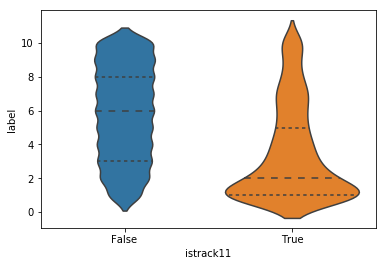

In [26]:
import seaborn as sns
sns.violinplot(x="istrack11", y="label", data=df[df.dataset=="train"], inner="quartile")

In [ ]:
from sklearn.neural_network import MLPRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold


chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isBeat",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist","album", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isOSTAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
                  "num_album_per_min_artist", "num_album_per_min_composer", "num_line_lyric",
                    "custom_album"]

chosen_features = [ "numSongInAlbum", "isBeat", "isOSTAlbum","isBeatAlbum"]

chosen_features.append("mean_score_by_album_artist_id_min_cat")
df_train = df_train[df_train.numSongInAlbum>3]


folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))

    mlp = MLPRegressor( verbose=False,early_stopping=True)
    #Generate mean based on album and artist
    df_train["mean_score_by_album_artist_id_min_cat"] = np.nan # Init
    df_train["mean_score_by_album_artist_id_min_cat"].iloc[trn_idx] = df_train.iloc[trn_idx].  \
                                    groupby(["album_hash"])["label"].transform("mean")
    
#     haha = df_train.iloc[trn_idx].groupby("album")["album"].transform("count")
#     tmp = haha[haha.tmp==1]
#     print(tmp.label.mean())
    
    df_train["mean_score_by_album_artist_id_min_cat"] = df_train.groupby(["album_hash"])["mean_score_by_album_artist_id_min_cat"]\
                                            .transform(lambda column: column.fillna(column.mean()))\
                                            .fillna(1)
#     print(df_train[chosen_features].values)
    mlp.fit(df_train.iloc[trn_idx][chosen_features].values,labels.iloc[trn_idx])
    oof[val_idx] = mlp.predict(df_train.iloc[val_idx][chosen_features].values)
    
    df_test["mean_score_by_album_artist_id_min_cat"] = np.nan 
    df_all_tmp = pd.concat([df_train,df_test])
    df_all_tmp["mean_score_by_album_artist_id_min_cat"] = df_all_tmp.groupby(["album_hash"])["label"]\
                                            .transform(lambda column: column.fillna(column.mean()))\
                                            .fillna(1)
    
    
    df_test = df_all_tmp[df_all_tmp.dataset == "test"]
    predictions += mlp.predict(df_test[chosen_features]) / folds.n_splits
    print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(labels.iloc[val_idx], oof[val_idx]))))
    
    
print("Final RMSE: {:<8.5f}".format(sqrt(mean_squared_error(labels, oof))))
sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm1.csv", index=False, header=False)

In [ ]:
df.mean_score_by_album_artist_id_min_cat.unique()

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["album","artist_id_max_cat"])[["label"]].agg(["mean", "std", "count"])

df.groupby(["album","artist_id_max_cat"])[["label"]].agg(["mean", "std", "count"])
b = a[("label", "std")].fillna(-2)
c = b[b!=-2]
print("Mean std:", np.median(c))
import matplotlib.pyplot as plt
plt.hist(b)

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["album","artist_id_max_cat"])[["label"]].agg(["mean", "std", "count"])

df.groupby(["album","artist_id_max_cat"])[["label"]].agg(["mean", "std", "count"])
b = a[("label", "std")].fillna(-2)
c = b[b!=-2]
print("Mean std:", np.median(c))
import matplotlib.pyplot as plt
plt.hist(b)

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["album","artist_id_max_cat"])["label"].transform("mean")
a

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["album","composers_id_min_cat"])[["label"]].agg(["mean", "std", "count"])

df.groupby(["album","composers_id_min_cat"])[["label"]].agg(["mean", "std", "count"])
b = a[("label", "std")].fillna(-2)
import matplotlib.pyplot as plt
plt.hist(b)

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["custom_album","artist_name"])[["label"]].agg(["mean", "std", "count"])

df.groupby(["custom_album","artist_name"])[["label"]].agg(["mean", "std", "count"])
b = a[("label", "std")].fillna(-2)
import matplotlib.pyplot as plt
plt.hist(b)

In [ ]:
pd.set_option('display.max_rows', 3957)
a = df.groupby(["album","artist_id_min_cat"])[["labe              l"]].agg(["mean", "std", "count"])

df.groupby(["album","artist_id_min_cat"])[["label"]].agg(["mean", "std", "count"])

In [ ]:
b = a[("label", "std")].fillna(-2)
import matplotlib.pyplot as plt
plt.hist(b)

In [ ]:
pd.set_option('display.max_rows', 3957)
a["b"] = df.groupby(["album","artist_id_min_cat"])["label"].transform("mean")
a

In [ ]:
# features_to_combine = ["isRemix", "isOST", "isBeat", "isVersion", 
#                        "isCover", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum",
#                       "isBeatAlbum", "isCoverAlbum"]

features_to_combine = ["isLienKhuc", "isLienKhucAlbum", "isSingleAlbum","numsongInAlbum", "isSingleAlbum_onesong"]

import matplotlib.pyplot as plt
import seaborn as sns

title_features = features_to_combine
fig, axes = plt.subplots(23, 2, figsize=(20, 10*23))fig, axes = plt.subplots(23, 2, figsize=(20, 10*23))

for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

title_features = combine_features
fig, axes = plt.subplots(23, 2, figsize=(20, 10*23))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)



In [9]:


import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

# chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day"]
# chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist","album", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", "numsongInAlbum", "isSingleAlbum_onesong", "isLienKhuc", "isLienKhucAlbum"]


# chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isBeat",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist","album", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isOSTAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", "num_line_lyric"]

df_train = df[df.dataset=="train"]
# df_train = df_train[df_train.numSongInAlbum==1]

df_test = df[df.dataset=="test"]
chosen_features = [ "istrack11","no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isBeat",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isOSTAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
                  "num_album_per_min_artist", "num_album_per_min_composer"
                   
                    ]

chosen_features += ["album_hash","numSongInAlbum"]


# chosen_features = ["year", "month","hour", "day", "len_of_songname", 
#                    "isBeat",  "num_song_release_in_final_month",
#                    "genre","album_artist","album", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isOSTAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                   "dayofyear","weekday","isHoliday", "group_album_artist_id_min_cat"]

# chosen_combined_features = ["isRemix_isRemixAlbum", "isRemix_isCoverAlbum", "isOST_isVersion", "isOST_isRemixAlbum", 
#  "isOST_isSingleAlbum"]
# fig, axes = plt.subplots(23, 2, figsize=(20, 10*23))

X = df_train[chosen_features]
# df_train = df_train[df_train.numSongInAlbum]

y = df_train.label
# df1 = X[X.isna().any(axis=1)]
# print(df1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# chosen_features.append("mean_album_score")
# chosen_features.append("mean_artist_score")
# chosen_features.append("mean_score_by_album_artist_id_min_cat")

# chosen_features += combine_features
# chosen_features += chosen_combined_features
print(chosen_features)
print(len(chosen_features))
param = {
    'bagging_freq': 20,          
    'bagging_fraction': 0.95,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.1,     'learning_rate': 0.001,
    'max_depth': -1,             'metric':'root_mean_squared_error', 'min_data_in_leaf': 5,   
       'num_leaves': 50,            
    'num_threads': 8,              'tree_learner': 'serial',   'objective': 'regression',
    'reg_alpha': 0.6002650970728192, 'reg_lambda': 0.6003427518866501,'verbosity': 1,
    "seed": 99999
}

folds = StratifiedKFold(n_splits=7, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
# fig, axes = plt.subplots(5, 1, figsize=(10, 10*5))
# axes = axes.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    # Generate mean_album_score_features
#     df_train["mean_album_score"] = np.nan # Init
#     df_train["mean_album_score"].iloc[trn_idx] = df_train.iloc[trn_idx].groupby(["album"])["label"].transform("mean")
#     df_train["mean_album_score"] = df_train.groupby(["album"])["mean_album_score"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(0)
#     print(df_train.iloc[trn_idx]["mean_album_score"].unique())
#     df_test["mean_album_score"] = np.nan 
#     df_all_tmp = pd.concat([df_train,df_test])
#     df_all_tmp["mean_album_score"] = df_all_tmp.groupby(["album"])["label"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(0)
#     df_test = df_all_tmp[df_all_tmp.dataset == "test"]
    
    #Generate mean_artist_score
#     df_train["mean_artist_score"] = np.nan # Init
#     df_train.iloc[trn_idx]["mean_artist_score"] = df_train.iloc[trn_idx].groupby(["artist_id_min_cat"])["label"].transform("mean")
#     df_train["mean_artist_score"] = df_train.groupby(["artist_id_min_cat"])["mean_artist_score"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(0)
    
#     df_test["mean_artist_score"] = np.nan 
#     df_all_tmp = pd.concat([df_train,df_test])
#     df_all_tmp["mean_artist_score"] = df_all_tmp.groupby(["artist_id_min_cat"])["label"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(0)
#     df_test = df_all_tmp[df_all_tmp.dataset == "test"]

    #Generate mean based on album and artist
#     df_train["mean_score_by_album_artist_id_min_cat"] = np.nan # Init
#     df_train["mean_score_by_album_artist_id_min_cat"].iloc[trn_idx] = df_train.iloc[trn_idx].  \
#                                     groupby(["album_hash","artist_id_min_cat"])["label"].transform("mean")
# #     axes[fold_].scatter(df_train.iloc[trn_idx]["mean_score_by_album_artist_id_min_cat"].values,
# #                     df_train.iloc[trn_idx]["label"].values)
    
# #     print("num distinct values:",  len(df_train.iloc[trn_idx]["mean_score_by_album_artist_id_min_cat"].unique()))
#     df_train["mean_score_by_album_artist_id_min_cat"] = df_train.groupby(["album_hash","artist_id_min_cat"])["mean_score_by_album_artist_id_min_cat"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(2)
#     df_train["mean_score_by_album_artist_id_min_cat"] = df_train["mean_score_by_album_artist_id_min_cat"].apply(lambda x: np.round(x))
    
    
#     df_test["mean_score_by_album_artist_id_min_cat"] = np.nan 
#     df_all_tmp = pd.concat([df_train,df_test])
#     df_all_tmp["mean_score_by_album_artist_id_min_cat"] = df_all_tmp.groupby(["album_hash","artist_id_min_cat"])["label"]\
#                                             .transform(lambda column: column.fillna(column.mean()))\
#                                             .fillna(2)
    
#     df_all_tmp["mean_score_by_album_artist_id_min_cat"] = df_all_tmp["mean_score_by_album_artist_id_min_cat"].apply(lambda x: np.round(x))
    
#     df_test = df_all_tmp[df_all_tmp.dataset == "test"]
        
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][chosen_features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][chosen_features], label=labels.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 20000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits



['istrack11', 'no_artist', 'no_composer', 'freq_artist', 'freq_composer', 'year', 'month', 'hour', 'day', 'len_of_songname', 'isBeat', 'num_song_release_in_final_month', 'length', 'genre', 'track', 'album_artist', 'islyric', 'album_artist_contain_artistname', 'len_album_name', 'isOSTAlbum', 'album_name_is_title_name', 'isBeatAlbum', 'artist_name_cat', 'composers_name_cat', 'copyright_cat', 'artist_id_min_cat', 'composers_id_min_cat', 'artist_id_max_cat', 'composers_id_max_cat', 'freq_artist_min', 'freq_composer_min', 'dayofyear', 'weekday', 'isHoliday', 'num_album_per_min_artist', 'num_album_per_min_composer', 'album_hash', 'numSongInAlbum']
38
Fold 0
Training until validation scores don't improve for 20000 rounds
[5000]	training's rmse: 1.76208	valid_1's rmse: 1.99832
[10000]	training's rmse: 1.43301	valid_1's rmse: 1.8311
[15000]	training's rmse: 1.24489	valid_1's rmse: 1.7636
[20000]	training's rmse: 1.11195	valid_1's rmse: 1.72356
[25000]	training's rmse: 1.0117	valid_1's rmse: 1.6

[110000]	training's rmse: 0.426658	valid_1's rmse: 1.59478
[115000]	training's rmse: 0.412634	valid_1's rmse: 1.59471
[120000]	training's rmse: 0.399667	valid_1's rmse: 1.59462
[125000]	training's rmse: 0.38726	valid_1's rmse: 1.59462
[130000]	training's rmse: 0.375767	valid_1's rmse: 1.59464
[135000]	training's rmse: 0.364938	valid_1's rmse: 1.59476
[140000]	training's rmse: 0.354933	valid_1's rmse: 1.59493
Early stopping, best iteration is:
[120686]	training's rmse: 0.397994	valid_1's rmse: 1.59458
Fold 5
Training until validation scores don't improve for 20000 rounds
[5000]	training's rmse: 1.76017	valid_1's rmse: 2.00483
[10000]	training's rmse: 1.4306	valid_1's rmse: 1.83655
[15000]	training's rmse: 1.24166	valid_1's rmse: 1.76694
[20000]	training's rmse: 1.10848	valid_1's rmse: 1.72729
[25000]	training's rmse: 1.00777	valid_1's rmse: 1.70273
[30000]	training's rmse: 0.927488	valid_1's rmse: 1.68647
[35000]	training's rmse: 0.860663	valid_1's rmse: 1.67471
[40000]	training's rmse:

In [ ]:
import pickle
from joblib import dump, load

dump(clf,"model.joblib")

np.save("oof.npy",  oof)

In [ ]:
a=[1.59,1.61,1.63,1.63, 1.65]
print(np.mean(a))
print(np.std(a))

In [10]:
from math import sqrt

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, oof))))

sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm.csv", index=False, header=False)

RMSE: 1.60615 


In [ ]:
import matplotlib.pyplot as plt
def plot_result(df_train, oof):
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=99999)
    fig,ax = plt.subplots(6,2,figsize=(20,30))
    ax =ax.flat
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
        print("Fold {}".format(fold_))
        
        print("RMSE: {:<8.5f} ".format(sqrt(mean_squared_error(df_train.label[val_idx], oof[val_idx]))))
        
        r = {}
        for yt, yp  in zip(df_train.label.values[val_idx], oof[val_idx]):
            if yt in sorted(r.keys()):
                r[yt].append(yp)
            else:
                r[yt] = [yp]

        x1 = sorted(r.keys())
        values = np.array([r[k] for k in x1])
        print(x1)
        means= [np.mean(value) for value in values]
#         print("Means: ",means)
        mi= [np.min(value) for value in values]
        ma= [np.max(value) for value in values]
        quan25= [np.quantile(value, 0.1) for value in values]
        quan75= [np.quantile(value, 0.9) for value in values]

        ax[fold_*2].plot(x1, means, label="Mean Rank prediction")
        ax[fold_*2].fill_between(x1, mi,ma,color='b', alpha=0.2 , label="Min-Max Rank prediction")
        ax[fold_*2].fill_between(x1, quan25,quan75,color='r', alpha=0.5 ,label="10-th to 90-th Rank prediction")
        ax[fold_*2].legend(loc='upper left')
        ax[fold_*2].set_xlabel("Actual Rank")
        ax[fold_*2].set_ylabel("Predicted Rank")
        
        ax[fold_*2+1].hist(df_train.label.values[val_idx])
        ax[fold_*2+1].set_xlabel("ActualRank")
        ax[fold_*2+1].set_ylabel("Count")
    
    
    r = {}
    for yt, yp  in zip(df_train.label.values, oof):
        if yt in sorted(r.keys()):
            r[yt].append(yp)
        else:
            r[yt] = [yp]

    x1 = sorted(r.keys())
    values = np.array([r[k] for k in x1])
    means= [np.mean(value) for value in values]
    mi= [np.min(value) for value in values]
    ma= [np.max(value) for value in values]
    quan25= [np.quantile(value, 0.1) for value in values]
    quan75= [np.quantile(value, 0.9) for value in values]
    ax[10].plot(x1, means, label="Mean Rank prediction")
    ax[10].fill_between(x1, mi,ma,color='b', alpha=0.2 , label="Min-Max Rank prediction")
    ax[10].fill_between(x1, quan25,quan75,color='r', alpha=0.5 ,label="10-th to 90-th Rank prediction")
    ax[10].legend(loc='upper left')
    ax[10].set_xlabel("Actual Rank")
    ax[10].set_ylabel("Predicted Rank")
    plt.show()

from joblib import dump, load
# clf1= load("model.joblib")
oof = np.load("oof.npy")
plot_result(df_train, oof)

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=99999)
fig,ax = plt.subplots(5,2,figsize=(20,30))
ax =ax.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    if fold_== 0:
        print("Fold {}".format(fold_))
        oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
        for oof_e, (i,o) in zip(oof[val_idx], df_train.iloc[val_idx].iterrows()):
            if (o.label ==9):
                print(o.album,"----------",o.album_artist,"----",o.artist_name,"--",o.label,"---",oof_e)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
lgb.plot_importance(clf, max_num_features=20,importance_type='gain')


In [ ]:
clf.feature_importance()

In [ ]:
%matplotlib qt5
lgb.plot_tree(clf)